In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [8]:
sns.set()

In [5]:
df = pd.read_csv("Housing.csv")

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.shape

(545, 13)

### Data exploration

In [226]:
corr_mat = df.corr()

<AxesSubplot: >

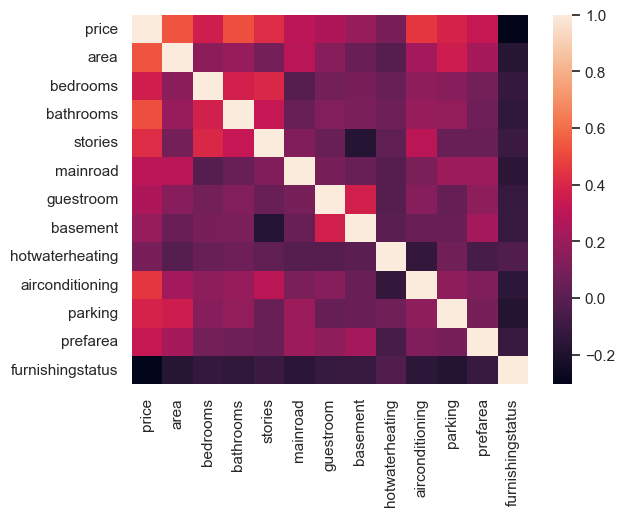

In [227]:
sns.heatmap(corr_mat)

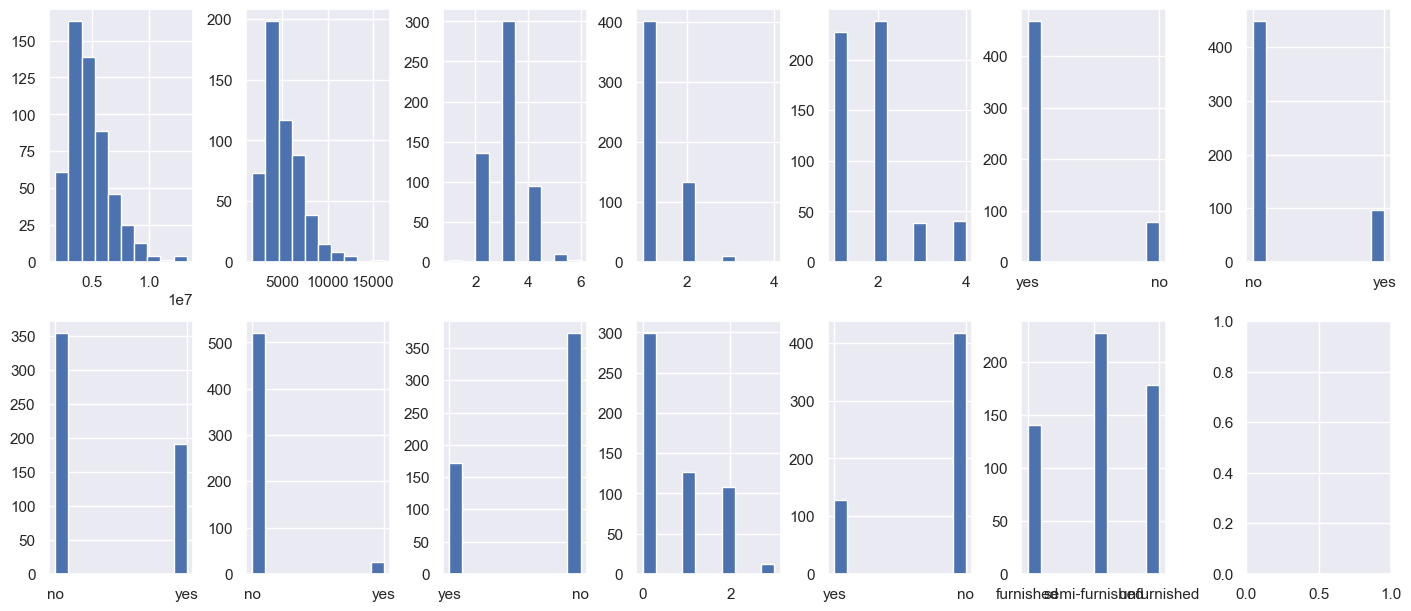

In [26]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(14, 6),
                        layout="constrained")

c = 0
for i in range(0,2):
    for j in range(0,7):
        
        try:
            axs[i,j].hist(df[df.columns[c]])
            c+=1
        except:
            continue

In [35]:
for _ in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    
    df [_] = df[_].map({"yes": 1, "no": 0})

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [42]:
enc = LabelEncoder()

In [44]:
enc.fit(df["furnishingstatus"])

LabelEncoder()

In [45]:
df["furnishingstatus"] = enc.transform(df["furnishingstatus"])

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


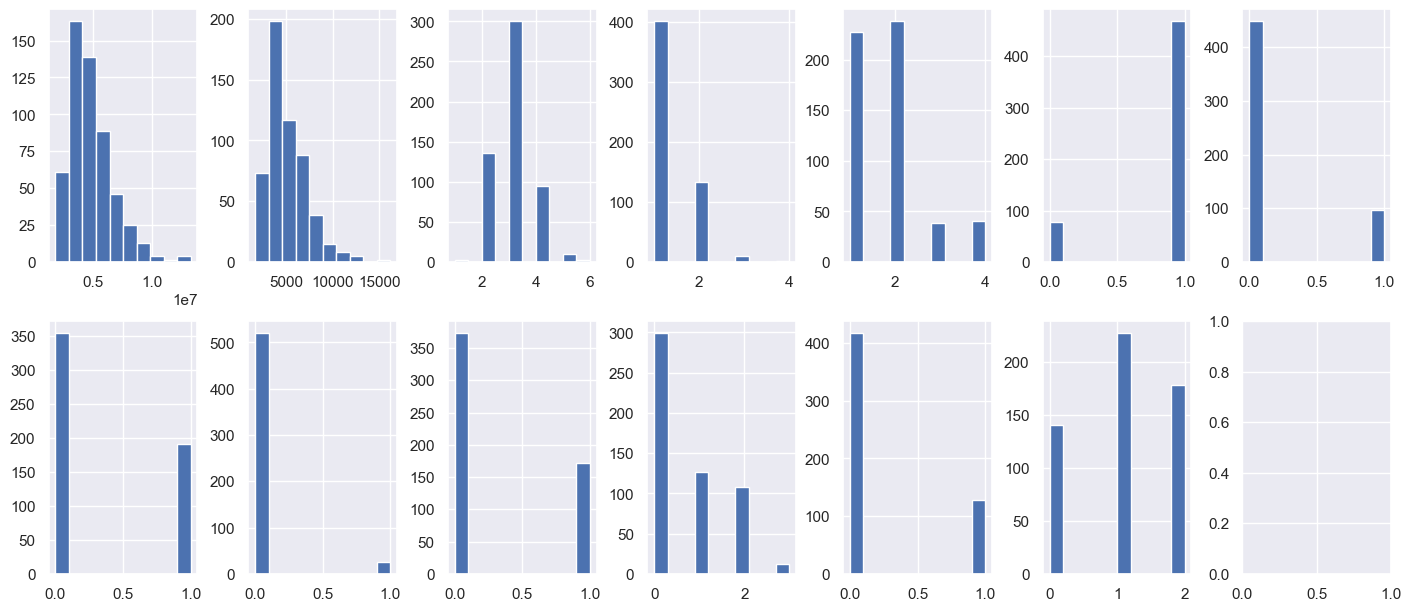

In [47]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(14, 6),
                        layout="constrained")

c = 0
for i in range(0,2):
    for j in range(0,7):
        
        try:
            axs[i,j].hist(df[df.columns[c]])
            c+=1
        except:
            continue

In [51]:
for _ in range(len(df.columns)):
    
    print(f"VIF score for {df.columns[_]}, index: {_}", vif(df, _))

VIF score for price, index: 0 23.45641692684383
VIF score for area, index: 1 9.964372335655533
VIF score for bedrooms, index: 2 16.52040377908588
VIF score for bathrooms, index: 3 11.101384912241839
VIF score for stories, index: 4 8.611870312825626
VIF score for mainroad, index: 5 7.005460986101846
VIF score for guestroom, index: 6 1.4867880736597376
VIF score for basement, index: 7 2.0549975481355682
VIF score for hotwaterheating, index: 8 1.120502036671212
VIF score for airconditioning, index: 9 1.9645051593943452
VIF score for parking, index: 10 2.0703624564117606
VIF score for prefarea, index: 11 1.5796897404352916
VIF score for furnishingstatus, index: 12 2.7117312185658164


### Data split

In [60]:
X = df[df.columns[1:]]

In [62]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [63]:
y = df[df.columns[0]]

In [64]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160,3,1,1,1,0,1,0,0,2,1,2
363,3584,2,1,1,1,0,0,1,0,0,0,1
370,4280,2,1,1,1,0,0,0,1,2,0,1
31,7000,3,1,4,1,0,0,0,1,2,0,1
113,9620,3,1,1,1,0,1,0,0,2,1,0


### Normal Model training 

In [55]:
linMod = LinearRegression()

In [68]:
linMod.fit(X_train, y_train)

LinearRegression()

In [69]:
y_hat = linMod.predict(X_test)

In [73]:
y_hat.shape

(164,)

In [75]:
y_test.shape

(164,)

In [77]:
mean_squared_error(y_test, y_hat)

1535047758428.05

In [86]:
sum((y_test - y_hat)**2)/len(y_hat)

1535047758428.05

In [81]:
r2_score(y_test, y_hat)

0.6435419628959107

In [87]:
1 - (sum((y_test - y_hat)**2)/sum((y_test - np.mean(y_test))**2))

0.6435419628959106

### Lasso Model training

In [310]:
LassoMod = Lasso(alpha=1)

In [311]:
LassoMod.fit(X_train, y_train)

Lasso(alpha=1)

In [312]:
y_hat1 = LassoMod.predict(X_test)

In [313]:
y_hat1.shape

(164,)

In [314]:
y_test.shape

(164,)

In [315]:
mean_squared_error(y_test, y_hat1)

1535050120826.396

In [316]:
sum((y_test - y_hat1)**2)/len(y_hat1)

1535050120826.3955

In [317]:
r2_score(y_test, y_hat1)

0.6435414143163158

In [318]:
1 - (sum((y_test - y_hat1)**2)/sum((y_test - np.mean(y_test))**2))

0.643541414316316

### Hyperparameter tuning: Lasso  

In [326]:
parameters = {"alpha": [0.1, 1, 3, 5, 10, 20, 40, 80]}

In [327]:
LassoMod = Lasso()

In [328]:
clf = GridSearchCV(LassoMod, parameters, scoring="r2", cv=5)

In [329]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 3, 5, 10, 20, 40, 80]},
             scoring='r2')

In [330]:
clf.cv_results_

{'mean_fit_time': array([0.0015996 , 0.00100017, 0.00119958, 0.002     , 0.00140004,
        0.00200005, 0.00139995, 0.00179992]),
 'std_fit_time': array([4.89337099e-04, 2.61174468e-07, 4.00257395e-04, 3.56832255e-07,
        4.89843081e-04, 2.33601546e-07, 4.89823515e-04, 3.99994861e-04]),
 'mean_score_time': array([0.00100045, 0.00159965, 0.00099998, 0.00100002, 0.00119996,
        0.00100002, 0.00100002, 0.00120006]),
 'std_score_time': array([5.09122765e-07, 4.89765214e-04, 9.53674316e-08, 6.14361702e-07,
        3.99827971e-04, 1.16800773e-07, 1.16800773e-07, 3.99899493e-04]),
 'param_alpha': masked_array(data=[0.1, 1, 3, 5, 10, 20, 40, 80],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 3},
  {'alpha': 5},
  {'alpha': 10},
  {'alpha': 20},
  {'alpha': 40},
  {'alpha': 80}],
 'split0_test_score': array([0.69297706, 0.69297692, 0.69297662, 0.692

### Ridge Model training

In [216]:
RidgeMod = Ridge(alpha=3)

In [217]:
RidgeMod.fit(X_train, y_train)

Ridge(alpha=3)

In [218]:
y_hat2 = RidgeMod.predict(X_test)

In [219]:
y_hat2.shape

(164,)

In [220]:
y_test.shape

(164,)

In [221]:
mean_squared_error(y_test, y_hat2)

1542459390043.4128

In [222]:
sum((y_test - y_hat2)**2)/len(y_hat2)

1542459390043.4124

In [223]:
r2_score(y_test, y_hat2)

0.6418208857223533

In [224]:
1 - (sum((y_test - y_hat2)**2)/sum((y_test - np.mean(y_test))**2))

0.6418208857223534

### Hyperparameter training: Ridge 

In [331]:
parameters = {"alpha": [0.1, 1, 3, 5, 10, 20, 40, 80]}

In [332]:
RidgeMod = Ridge()

In [333]:
clf = GridSearchCV(RidgeMod, parameters, scoring="r2", cv=3)

In [334]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 3, 5, 10, 20, 40, 80]},
             scoring='r2')

In [335]:
clf.cv_results_

{'mean_fit_time': array([0.00200009, 0.00366505, 0.00199986, 0.00166663, 0.0016667 ,
        0.00166631, 0.00133324, 0.00133244]),
 'std_fit_time': array([1.94667955e-07, 3.09086224e-03, 0.00000000e+00, 4.71426640e-04,
        4.71482745e-04, 4.71707529e-04, 4.71370354e-04, 4.70583653e-04]),
 'mean_score_time': array([0.0013326 , 0.00200097, 0.0013334 , 0.00133348, 0.00099977,
        0.00100001, 0.00100072, 0.00100017]),
 'std_score_time': array([4.70134046e-04, 1.58547857e-06, 4.71426560e-04, 4.71538951e-04,
        1.12391596e-07, 2.24783192e-07, 1.14065012e-06, 1.94667955e-07]),
 'param_alpha': masked_array(data=[0.1, 1, 3, 5, 10, 20, 40, 80],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 3},
  {'alpha': 5},
  {'alpha': 10},
  {'alpha': 20},
  {'alpha': 40},
  {'alpha': 80}],
 'split0_test_score': array([0.68832469, 0.69040931, 0.69247634, 0.692